# P Cyngi Star model

Figure 1.7 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Plot of an idealized P Cygni outflow spectrum.  Second panel of a 2-panel plot, the first of which is
a sketch of the outflow geometry.  The sketch is composed in a separate PowerPoint file.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [2]:
plotFile = 'Fig1_7b.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Idealized P Cygni Profile

Parameters:
 * v/v$_\infty$ range: -1.2 to 1.2
 * absorption depth: cabs = 0.5
 * emission peak: cem = 1.0


In [3]:
# absorption depth

cabs = 0.5

# emission peak

cem = 1.0

# range of velocity in units of v_infinity, dimensionless x = v/v_inf

xmin = -1.2
xmax = 1.2
x = np.linspace(xmin,xmax,1001)

# absorption "line"

abs = []

for vvinf in x:
    if vvinf > -1.0 and vvinf < 0.0:
        abs.append(-cabs * (1.0 - (2.0*vvinf + 1.0)**2)**0.25)
    else:
        abs.append(0.0)
        
em = []
for vvinf in x:
    if vvinf > -1.0 and vvinf < 1.0:
        em.append(cem * (1.0 - vvinf**2)**2)
    else:
        em.append(0.0)

pcyg = np.array(abs) + np.array(em)


### Figure 1.7b

Plot of an idealized P Cygni profile, separating absorption and emission components.
 * solid = total line profile
 * dashed = emission-line profile
 * dotted = blue-shifted absorption-line profile
 

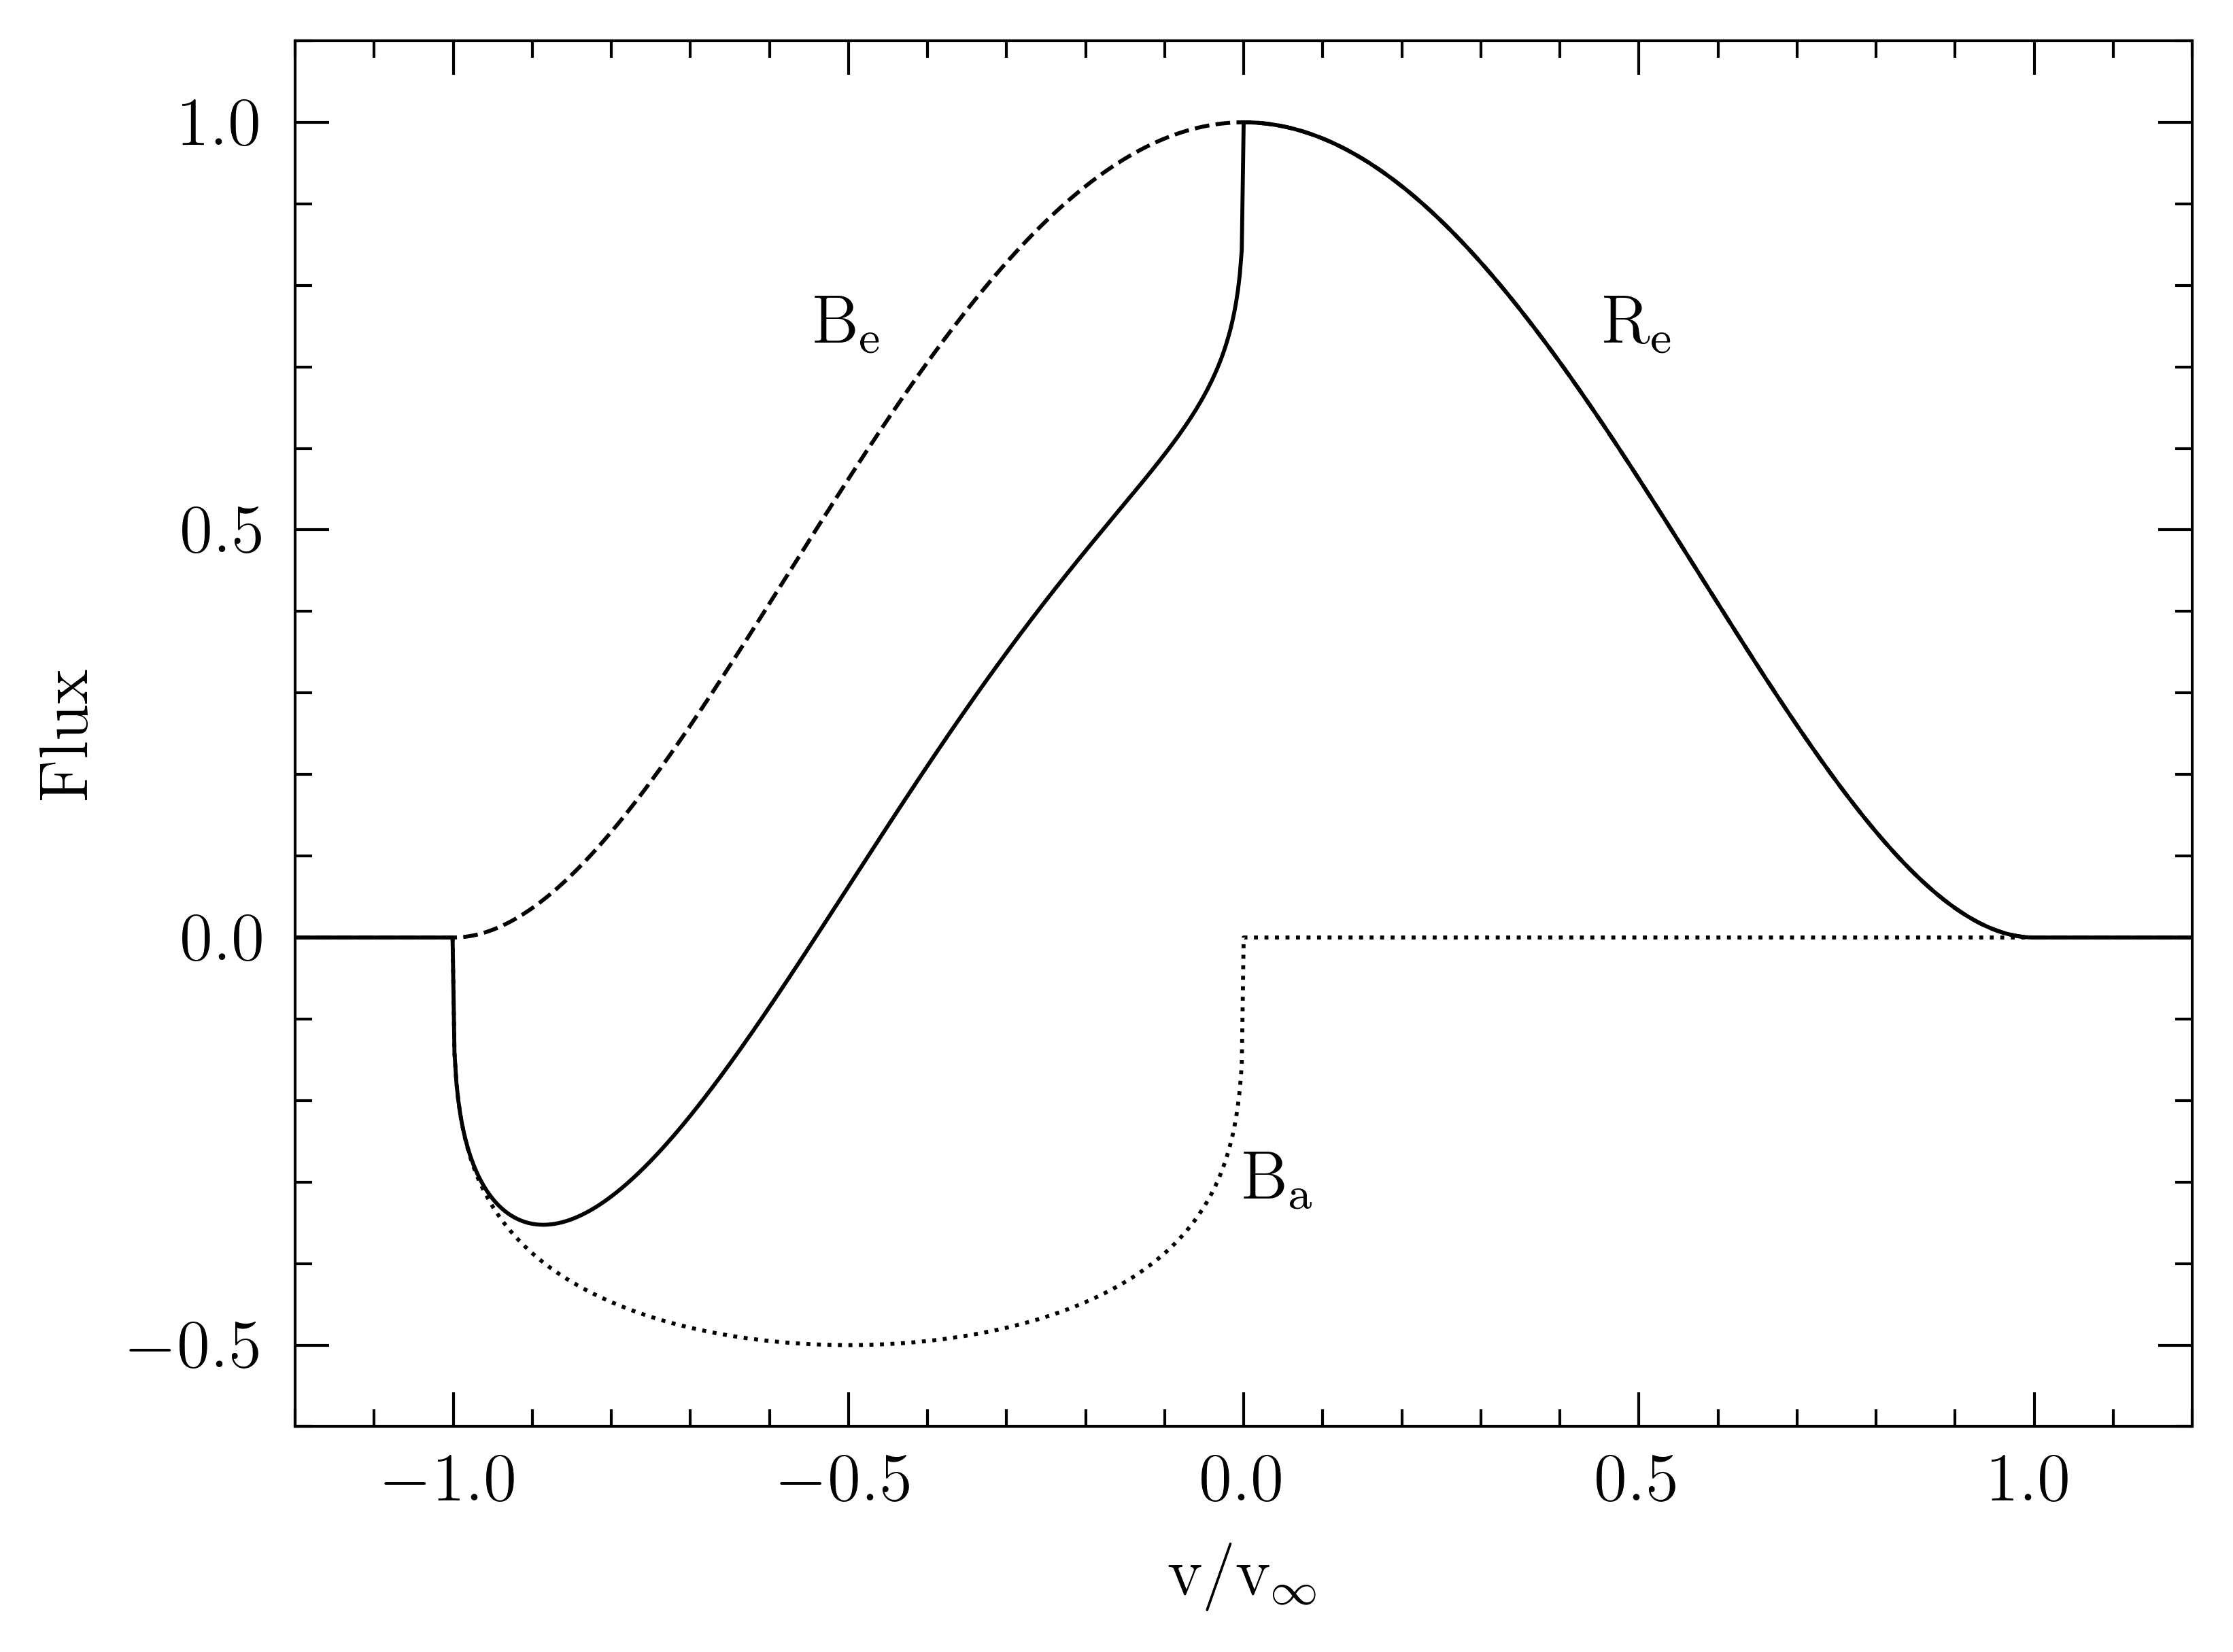

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlabel(r'v/v$_{\infty}$',fontsize=axisFontSize)

ax.set_ylim(-0.6,1.1)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylabel(r'Flux',fontsize=axisFontSize)

ax.plot(x,pcyg,'-',color='black',lw=0.7,zorder=10)
ax.plot(x,em,'--',color='black',lw=0.7,zorder=10)
ax.plot(x,abs,':',color='black',lw=0.7,zorder=10)

ax.text(-0.5,0.75,r'B$_{\rm e}$',va='center',ha='center',fontsize=axisFontSize)
ax.text(0.5,0.75,r'R$_{\rm e}$',va='center',ha='center',fontsize=axisFontSize)
ax.text(0.0,-0.3,r'B$_{\rm a}$',va='center',ha='left',fontsize=axisFontSize)

ax.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')